# Tutorial Basics Sheet Music Part 1: Introduction and Visualization 

(version 2022_02_06)

### Table of contents: 
1. [Jupyter notebook: Basic functions](#basics)
2. [Loading sheet music files (MusicXML)](#download)
3. [Excursus: the xml-parser and the pandas-dataframe](#xml-parser)
4. [Piano roll visualization](#pianorollen)
5. [Selection of voices or measures](#selection)
6. [Tasks](#tasks)

This tutorial introduces the setup and functionality of a Jupyter notebook and shows how CAMAT (Computer-Assisted Music Analysis Tool) can be used for the visualization and analysis of sheet music data.

Based on this, the tutorial Part 2 presents options for simple statistical queries.


### 1. Jupyter notebook: Basic functions <a id='basics'></a>

A Jupyter notebook is a file that can be opened and edited within the browser. Each Jupyter notebook consists of a sequence of text blocks (Markdown Cells) and blocks of programming code in the Python programming language (Code Cells). By pressing the Enter key within a block, text or code can be changed, added or deleted. Own, changed versions of the notebook can be saved under a new name (Menu: File -> Save as...).

IMPORTANT: The commands of each code cell are executed with the Run button. During execution (which may take some seconds for some commands), an hourglass icon is displayed at the top of the browser tab. Afterwards, results (or error messages) are displayed, if any, and the cursor jumps to the next box.
Please go through the tutorials code cell by code cell, activate the respective code with the Run button and wait and see what happens!

In the code cells, all lines following a hash sign (#) are not executed; this provides the opportunity to note either explanations of the code or additional optional commands that are executed by deleting the hash (and then running).


In [1]:
# Of course, you can also calculate with the commands:
# Please press 'Run'!

21 * 7 + 1 

# Now change the calculation numbers.
# Then press 'Run' again!

148

A new cell is created with the + button or the menu item Insert and can then be defined in the menu as markdown or code cell. Here you can add your own comments or commands. (And please don't forget to save the notebook under a new name beforehand!).

Parallel to the notebook a command window is running, which you do not have to consider further - but don’t close it! Please close a notebook with the menu command 'File' -> 'Close and Halt', then log out and close the command window at the very end.


Every session with a Jupyter Notebook starts with the import of the required Python libraries: 

In [1]:
import sys
import os
sys.path.append(os.getcwd().replace(os.path.join('music_xml_parser', 'ipynb'), ''))

import music_xml_parser as mp
from music21 import * 
import csv
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# These commands are used to parse the core of CAMAT, the 'music_xml_parser', 
# and load the python libraries 'numpy' and 'pandas' for static evaluations,  
# 'matplotlib' for graphical representations,  
# csv' loaded for table export 
# and ' music21 '.

# The following command allows the download of URLs from the Internet: 
 
environment.set('autoDownload', 'allow')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# optimizes the display in the browser

### 2. Loading sheet music files (MusicXML) <a id='download'></a>

The next step is to load a note file in MusicXML format (xml for short) and give it the name 'xml_file'. You can also choose any other name, but then you have to change the corresponding commands in the code cells accordingly!

There are two options when loading sheet music files:
1.	The sheet music file is loaded from the local hard disk, which was previously placed in the 'data/xmls_to_parse' folder of the 'music_xml_parser'. Then the file name must be entered (in single quotes).
2.	The sheet music file is loaded directly from the Internet by typing the URL (in single quotes).

In the following example we load the first movement (Adagio) from the String Quartet No. 11 in E-flat major - Adagio, Köchel catalog 171, by Wolfgang Amadeus Mozart from the project database (cf. https://analyse.hfm-weimar.de/doku.php?id=en:mowo resp. https://analyse.hfm-weimar.de/doku.php?id=en:notenauswahl#mozart_wolfgang_amadeus_1756-1791), in which we transfer the link to the xml file with a right click and "Copy link address".

Subsequently, a so-called Pandas data frame (see section 3) of the xml file is generated, which serves as a kind of internal database for all further evaluations.

In [3]:
xml_file = 'https://analyse.hfm-weimar.de/database/03/MoWo_K171_COM_1-4_StringQuar_003_00867.xml'

# The command loads a MusicXML file from the Internet 
# and gives it the internal variable name 'xml_file'.
# You can of course load other files here,  
# by copying their URL (or path).
# And you can assign other internal names for the files.  

# The following command creates a pandas dataframe (named 'm_df') from this:

m_df = mp.parse.with_xml_file(file=xml_file,
                              do_save=True, 
                              save_file_name='mozart.csv')

>>> MoWo_K171_COM_1-4_StringQuar_003_00867.xml downloaded!

File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


The command allows you to specify two parameters (green fields):

1.	do_save=True -> the Pandas dataframe file will be saved in the 'Exports' folder. If you change the value to 'None', the saving will be waived.

2.	save_file_name = 'None' -> the Pandas dataframe file will be saved under the same file name as a .csv file; csv means: 'comma separate variable'. Instead of True you can enter any file name with the extension .csv, e.g. change 'mozart.csv' (please use single quotes!) Then you can open the file in the exports folder.


### 3. Excursus: the xml-parser and the pandas-dataframe <a id='xml-parser'></a>

The **xml-Parser**is a Python module developed as part of the Fellowship project for processing a MusicXML file and is used, among other things, for visualization and statistical analysis of the information contained in the file. The basic concept of the module is to store all the information present in the note file in the form of a [Pandas-Dataframes](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe), which allows very efficient calculations and data management of the data read in.

The so-called **xml parser** has an internally defined data structure, which can already be found on your computer after the zip file has been extracted: There are three folders in the **music_xml_parser** folder:

1.	**core** contains all program relevant Python scripts. *Please do not change!!*

2.	**data** contains the folders

•	**xmls_to_parse**. This folder contains all xml files that can be read in directly (i.e. without specifying a path). You can put your own xml files into the folder. Alternatively, you can read in files directly from the Internet.
•	**exports**: Here are all the files you have generated in the course of your work with the Jupyter notebook, e.g. tables (.csv) or graphics (.png).

3.	**ipynb** - contains all Jupyter notebooks (.ipynb); modified notebooks should also be stored here, gladly also in subfolders.


After you have created a dataframe 'm_df' of your note file by the last command, you can view the data by opening the file m_df.csv saved there in the **exports** folder (with Excel or a text editor) - provided you have selected 'do_save=True'.

You can also output the data as a table in the browser. To do this, please activate the following command ‘m_df’ by deleting the hash (#) in front of it and then pressing 'Run'.

IMPORTANT: Even with smaller note files, this representation requires a lot of memory; therefore, the command should preferably be skipped!


In [2]:
# m_df

# If you delete the hash (#) and press Run, 
# the command 'm_df' is executed and a table 
# with first and last rows of the pandas dataframe is displayed.

# For a complete view use the following command:  
# mp.utils.print_full_df(m_df)
# IMPORTANT: This can be very computationally intensive!

### 4. Piano roll visualization <a id='pianorollen'></a>

In the following code cell you activate the piano roll visualization of the sheet music file.

IMPORTANT: Unfortunately, large sheet music files cannot be displayed completely as piano rolls; the display is aborted and an error message is returned ('OverflowError: sleep length is too large'). Then it is better to choose the external display in a popup window (see below). Or use the filter function (see section 5) to select those sections that are of interest to you!

As an alternative to the piano roll representation in the browser you can choose the representation with the Sonic Visualiser. You can find out how to proceed here: https://analyse.hfm-weimar.de/doku.php?id=en:sv-pianoroll


File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


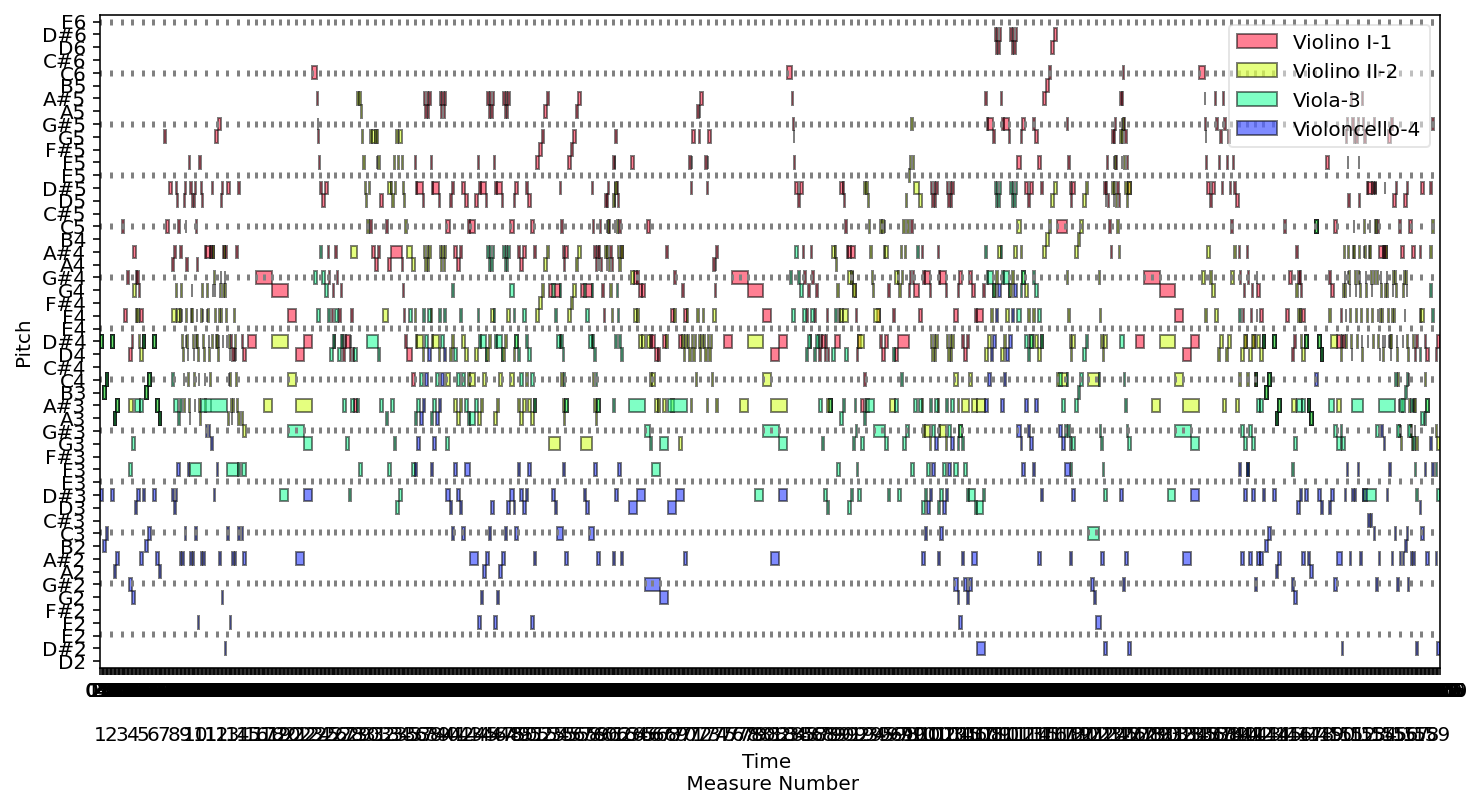

In [6]:
m_df = mp.parse.with_xml_file(file=xml_file, 
                              plot_pianoroll=True, 
                              plot_inline_ipynb=True)

Each voice is represented with its own color. If two voices play in unison (i.e. the same notes), the two colors mix.

Now open the sheet music file: First save the file on your hard disk (in the sheet music database: right click on the link -> 'Save target as'), open your score editor (e.g. MuseScore) and load the file.

Compare the sheet music representation with the piano roll representation. Where do the two representations differ? What can you see on the piano roll graphic? What are the advantages of the piano roll compared with the sheet music? What are the disadvantages?


Here is an alternative way of displaying by selecting *external/internal* display: By activating the command **'%matplotlib'** the display is changed to an external pop-up window. All following graphics are also affected by this!

In [7]:
# %matplotlib
# This command (activation by deleting #).
# selects an external representation.   

m_df = mp.parse.with_xml_file(file=xml_file, 
                              plot_pianoroll=True, 
                              plot_inline_ipynb=True)

Using matplotlib backend: Qt5Agg
File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


If you want to switch back to the browser display, you must execute the following command:

In [8]:
%matplotlib inline

In the following code cell some parameters are explained, with which the command above can be further modified. In each case the default settings are given, which apply as long as the parameter is not called explicitly, and it is noted in each case whether a string (string: 'str' or None), a number or a value ('bool', usually 'True', 'False' or 'None') has to be entered.

In [5]:
m_df = mp.parse.with_xml_file(xml_file,
        #file= str, (string value)  # Possibility for other variable names under which you have loaded sheet music files.
                                    # Default: xml_file
        #plot_pianoroll= bool       # show piano roll; default: False
        #plot_inline_ipynb= bool    # overwrites Matplotlib
        #do_save= bool              # by do_save=True the dataframe will be saved; default: False
        #save_at= str               # this sets the file path; default: None  
        #save_file_name= str        # the file name is specified here; default: None
        #x_axis_res= Zahl           # Resolution of the X-axis as a divisor of the quarter note; default: 2 (=0.5 quarter note)
        #ignore_upbeat= bool        # Ignore preamble correction; default: False
        #ignore_ties= bool          # Ignore slur calculation; default: False
                             )

File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


### 5. Selection of voices or measures<a id='selection'></a>

The following command allows to flexibly select voices and measures - for graphical representations or statistical queries. In the following example, the first 5 measures ('Measure':'1-5') of the first two voices ('PartID':'1-2') are selected:

File at:  ../music_xml_parser/data/xmls_to_parse/hfm_database/MoWo_K171_COM_1-4_StringQuar_003_00867.xml


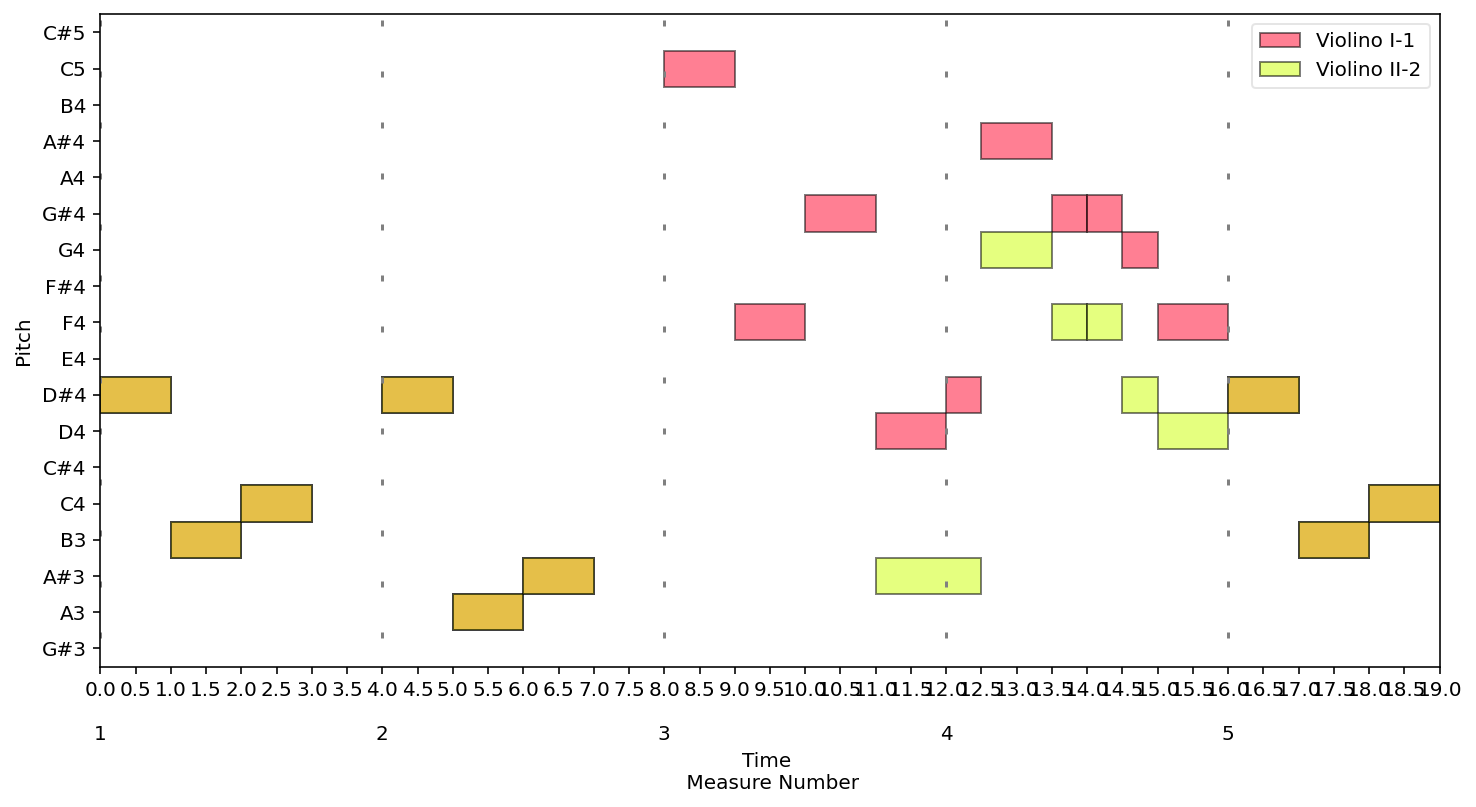

In [9]:
%matplotlib inline
# First, a filter named 'filter_dict_t' is defined. 

filter_dict_t = {'PartID':'1-2', 'Measure':'1-5'}

# Then the filter is added as another parameter to the piano roll command (see above):

# filter_dict=filter_dict_t


m_df_2 = mp.parse.with_xml_file(file=xml_file,
                                plot_pianoroll=True,
                                plot_inline_ipynb=True,
                                filter_dict=filter_dict_t)

In this excerpt, you can see how the two violins play in unison at the beginning (measures 1 and 2, brown), then their own voices (measure 3/4), and then in unison again in measure 5.

You can change the selection as you wish by changing the voice and bar specifications (red in the code cell). You can also define other filters with other filter names, but then you must insert the new filter in the last line: filter_dict= [filter name].

### 6. Tasks<a id='tasks'></a>

1.	Select different sections of the composition based on the score, write appropriate filters and visualize the sections with piano roll representations. 
Compare the progression of the four voices by generating a separate piano roll representation for each voice.

2.	Generate piano roll representations from other compositions and get familiar with the Jupyter notebook this way.
